# Housing Price Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#prices = pd.read_csv('imputeImpl2_cat_housingData.csv',na_filter = False,index_col=0)
prices = pd.read_csv('../../data/Ames_Housing_Price_Data.csv',index_col = 0)
estate = pd.read_csv('../../data/full_wCoord.csv')

In [2]:
prices.reset_index(drop = True, inplace = True)
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseSty

In [3]:
nulls = prices.isnull().sum(axis = 0)
nulls[nulls>1]


LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinType2      70
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

In [4]:
#testing the model w/o the maximum home price
outlier =prices.loc[prices.SalePrice ==184750]
outlier['OverallQual']

309    10
Name: OverallQual, dtype: int64

In [5]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseSty

In [6]:
#Creating a price per square foot column to help with feature engineering
prices['Price_sqft'] = prices['SalePrice']/prices['GrLivArea']

# Converting quality/condition categoricals to numerical

In [7]:
def ordinal_scale(Series):
    '''Returns a pandas Series where quality scores are converted to integers
    
    Args:
    
    Series: a pandas Series of categorical quality scores'''
    return prices[Series].replace({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

prices['KitchenQual'] = ordinal_scale('KitchenQual')
prices['ExterQual'] = ordinal_scale('ExterQual')
prices['ExterCond'] = ordinal_scale('ExterCond')
prices['HeatingQC'] = ordinal_scale('HeatingQC')

In [8]:
def fillna_ordinals(Series):
    '''
    Returns a pandas series replacing null values with DNE (Does Not Exist) so they can be imputed.
    
    Args:
    

    Series: str, column name in the pandas dataframe.
    '''
    prices[Series].fillna('DNE',inplace = True)
    return prices[Series]
    
impute_cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','FireplaceQu',
               'GarageQual','GarageCond','PoolQC','Fence']

for i in impute_cols:
    prices[i] = fillna_ordinals(i)

prices['GarageType'],prices['GarageFinish'] = fillna_ordinals('GarageType'),fillna_ordinals('GarageFinish')

In [9]:
prices['BsmtQual'].value_counts()

TA     1166
Gd     1077
Ex      188
Fa       78
DNE      69
Po        2
Name: BsmtQual, dtype: int64

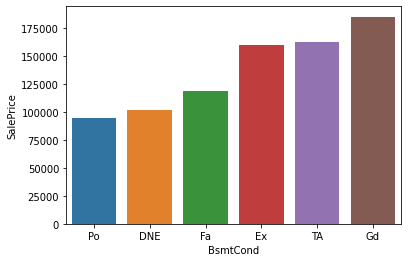

In [10]:
def cat_medians(Series):
    import seaborn as sns
    import matplotlib.pyplot as plt
    bars = prices.groupby(Series)['SalePrice'].median().reset_index().sort_values(by = 'SalePrice')
    sns.barplot(data = bars, x = Series,y = 'SalePrice')

    
cat_medians('BsmtCond')

In [11]:
for i in impute_cols:
    prices[i].replace({'Po':0,'DNE':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace = True)

In [12]:
# def impute_ordinals(Series):
#     '''
#     Returns a pandas series containing null values and converting to numerical, ordered by median price per sqft.
    
#     Args:
    

#     Series: str, column name in the pandas dataframe.
#     '''
#     prices[Series].fillna('DNE',inplace = True)
#     ords = prices.groupby(Series)['Price_sqft'].median().sort_values().reset_index()
#     ords = list(ords[Series])
#     impute = dict()
#     for i, j in enumerate(ords):
#         impute[j] = i
#     prices[Series].replace(impute, inplace = True)
#     return prices[Series]


In [13]:
# impute_cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#                'BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
#                'GarageQual','GarageCond','PoolQC','Fence']

# impute_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#                'BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
#                'GarageQual','GarageCond','PoolQC','Fence']
# for i in impute_cols:
#     prices[i] = impute_ordinals(i)

In [14]:
prices['MiscFeature'].fillna(0,inplace = True)
prices['MiscFeature'] = prices['MiscFeature'].apply(lambda M: 1 if M !=0 else M)
prices['CentralAir'].replace({'N':0,'Y':1},inplace = True)
prices['Street'].replace({'Grvl':1,'Pave':0},inplace = True)
prices['PavedDrive'].replace({'Y':1,'P':0.5,'N':0},inplace = True)
prices['Utilities'].replace({'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},inplace = True)

In [15]:
nulls = prices.isnull().sum(axis = 0)
nulls[nulls>1]

LotFrontage     462
MasVnrType       14
MasVnrArea       14
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     129
dtype: int64

In [16]:
new_prices = prices.copy()
new_prices = new_prices.loc[~new_prices['Neighborhood'].isin(['Landmrk','Greens','GrnHill'])]

In [17]:
def check_frontage(boro):
    x = prices['LotFrontage'].loc[prices['Neighborhood']==boro]
    return plt.hist(x)

(array([ 2.,  3.,  8., 30., 15., 14.,  9.,  5.,  2.,  2.]),
 array([ 40.,  48.,  56.,  64.,  72.,  80.,  88.,  96., 104., 112., 120.]),
 <BarContainer object of 10 artists>)

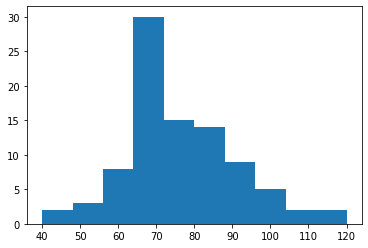

In [18]:
check_frontage('Sawyer')

## Reducing to numeric features

In [19]:
'MasVnrType','Electrical'

('MasVnrType', 'Electrical')

In [20]:
#impute lot frontage based off the mean of the respective neighborhood
def impute_by_neighborhood(Series):
    return new_prices[Series].fillna(new_prices.groupby('Neighborhood')[Series].transform('mean'))

In [21]:
new_prices['LotFrontage'] = impute_by_neighborhood('LotFrontage')
new_prices['GarageYrBlt'] = impute_by_neighborhood('GarageYrBlt')

<AxesSubplot:xlabel='Neighborhood', ylabel='GarageYrBlt'>

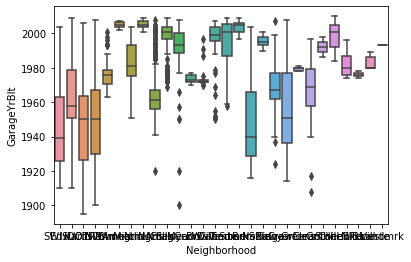

In [22]:
prices.groupby('Neighborhood')['GarageCars'].mean()
sns.boxplot(data = prices, x = 'Neighborhood', y = 'GarageYrBlt')

# Selecting numerical variables for multiple linear regression

In [23]:
# categorical_features = new_prices.select_dtypes(include = object)
# for i in categorical_features:
#     categorical_features[i].fillna(categorical_features[i].mode()[0], inplace=True)

# categorical_features = pd.get_dummies(categorical_features)
numeric_features = new_prices.select_dtypes(include = np.number)

# numeric_features =pd.concat([categorical_features, numeric_features], axis=1)


# imputing remaining numerical features with the mean
numeric_features_filled = numeric_features.fillna(numeric_features.mean())
#numeric_features_filled = numeric_features.copy()
y_price = np.log(numeric_features_filled['SalePrice'])
numeric_features_filled.drop(['PID','SalePrice','Price_sqft','MSSubClass'], axis = 1, inplace = True)



# OHE categorical values to numerical

In [24]:
# print(len(categorical_features.columns))
# categorical_features.columns

In [25]:
#prices = pd.get_dummies(prices,columns=['GarageFinish','SaleCondition'])



# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(handle_unknown='ignore')
# ohe.fit_transform(categorical_features['GarageFinish'].astype(str))

In [26]:
numeric_features_filled.columns

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold'],
      dtype='object')

In [27]:
#categorical_features['GarageType'].value_counts()

<AxesSubplot:>

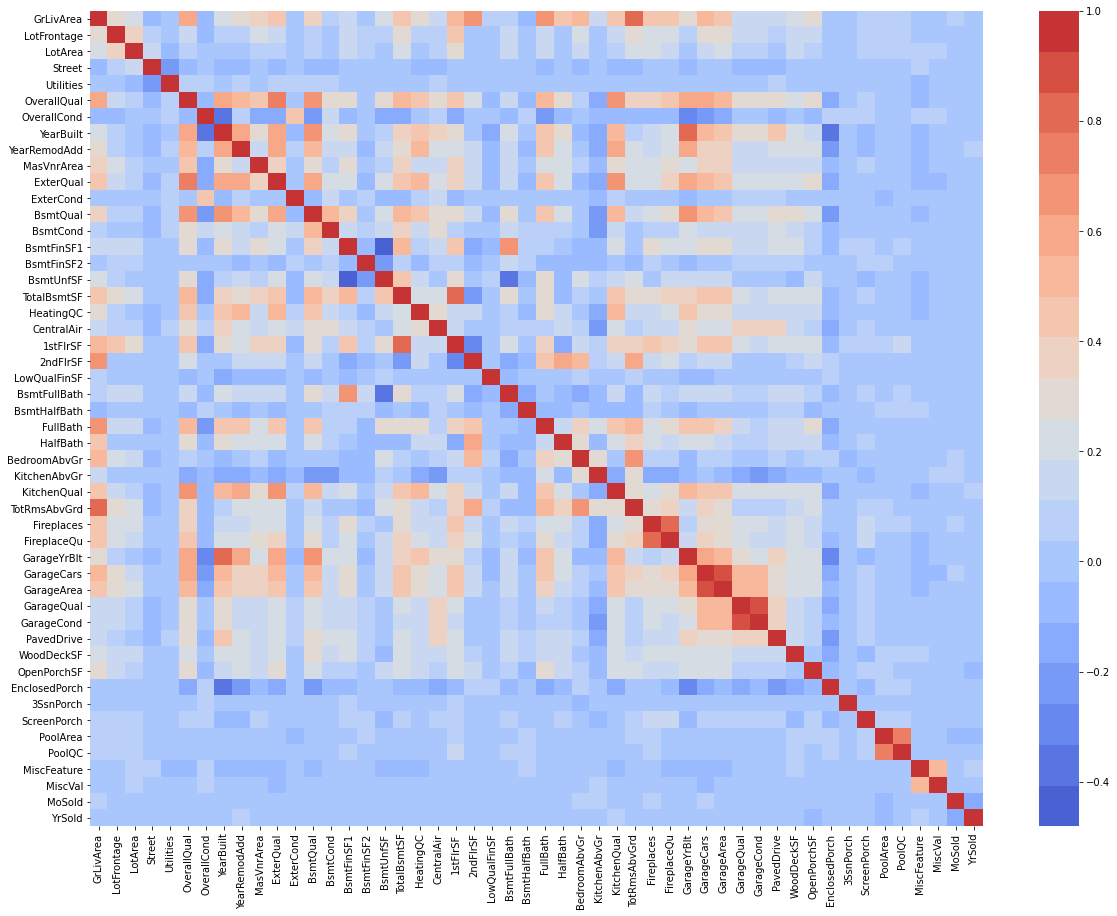

In [28]:
plt.figure(figsize = (20,15))
colormap = sns.color_palette('coolwarm',20)
sns.heatmap(numeric_features_filled.corr(),cmap = colormap)

In [29]:
r_prices = new_prices.corr()
r_prices = r_prices[['SalePrice']][1:]

<AxesSubplot:>

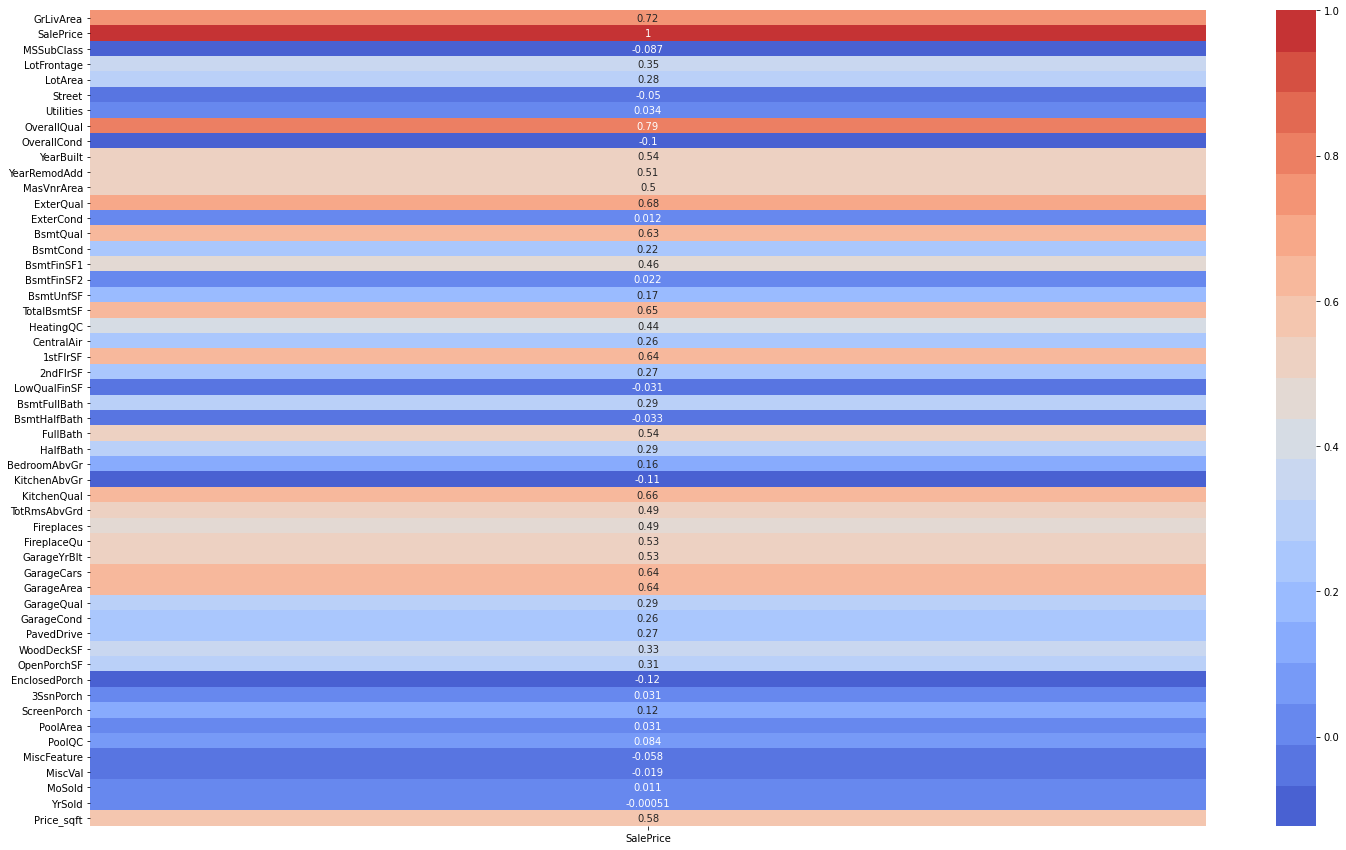

In [30]:
plt.figure(figsize = (25,15))
sns.heatmap(r_prices,annot = True,cmap = colormap)

In [31]:
numeric_features_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2579
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2569 non-null   int64  
 1   LotFrontage    2569 non-null   float64
 2   LotArea        2569 non-null   int64  
 3   Street         2569 non-null   int64  
 4   Utilities      2569 non-null   int64  
 5   OverallQual    2569 non-null   int64  
 6   OverallCond    2569 non-null   int64  
 7   YearBuilt      2569 non-null   int64  
 8   YearRemodAdd   2569 non-null   int64  
 9   MasVnrArea     2569 non-null   float64
 10  ExterQual      2569 non-null   int64  
 11  ExterCond      2569 non-null   int64  
 12  BsmtQual       2569 non-null   int64  
 13  BsmtCond       2569 non-null   int64  
 14  BsmtFinSF1     2569 non-null   float64
 15  BsmtFinSF2     2569 non-null   float64
 16  BsmtUnfSF      2569 non-null   float64
 17  TotalBsmtSF    2569 non-null   float64
 18  HeatingQ

# Distribution of numerical variables

In [32]:
numeric_colnames = numeric_features_filled.columns
len(numeric_colnames)

50

Median is 159900.0
Mean is 178059.62325581396


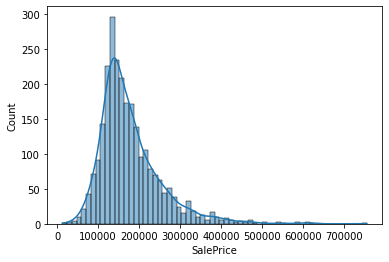

In [33]:
sns.histplot(new_prices.SalePrice,kde = True)
print(f'Median is {np.median(prices.SalePrice)}')
print(f'Mean is {np.mean(prices.SalePrice)}')

Text(0.5, 1.0, 'Distribution of numerical variables')

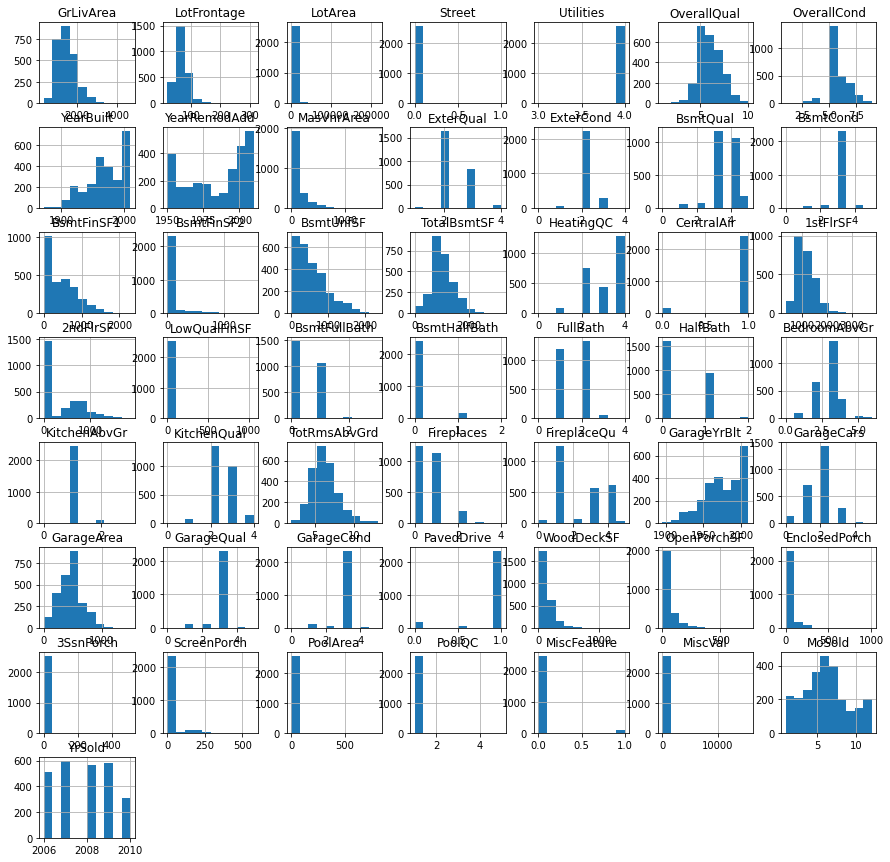

In [34]:
numeric_features_filled.hist(figsize = (15,15))
plt.title('Distribution of numerical variables')

### Five fold CV using KFold

<p> Gabi says drop garagecars, garagequal and garagecondition</p>

In [35]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso


Xtrain,Xtest,ytrain,ytest = train_test_split(numeric_features_filled,y_price)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cv = KFold(n_splits = 5, shuffle = True)


from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 3500000)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
# pipe = Pipeline(steps = [('ss',StandardScaler()),('lasso',lasso)])

alphas = np.linspace(.00001,0.02,1000)

cv_res=[]

for alpha in alphas:
    lasso.set_params(alpha = alpha)
    pipe = Pipeline(steps = [('ss',StandardScaler()),('lasso',lasso)])
    cv_res.append(cross_validate(pipe, Xtrain,ytrain,cv = cv, return_train_score = True))

In [36]:
lasso_test = [i['test_score'].mean() for i in cv_res]
lasso_train = [i['train_score'].mean() for i in cv_res]

Text(0, 0.5, 'Coefficient of Determination')

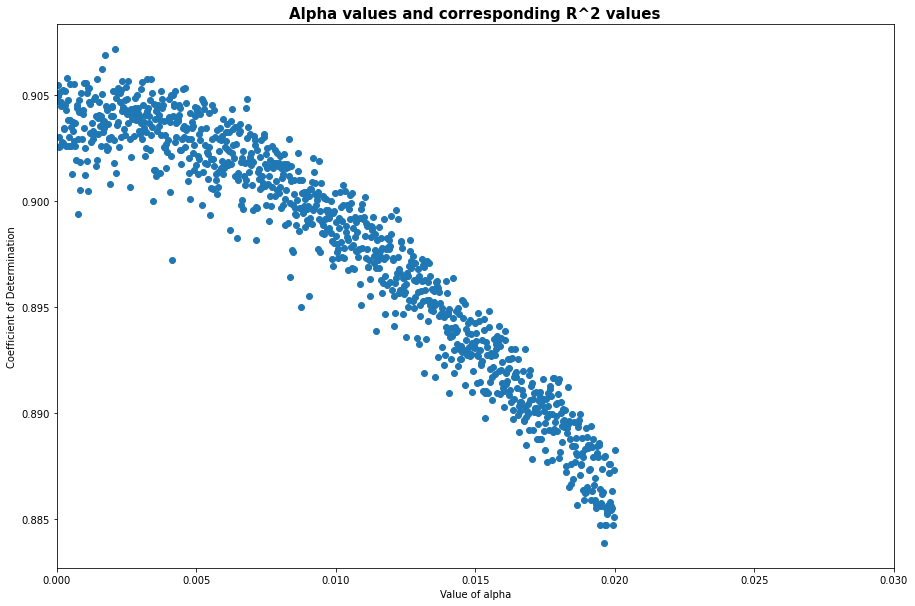

In [37]:
plt.figure(figsize = (15,10))
plt.scatter(alphas, lasso_test)
plt.xlim([0,0.03])
plt.title(r'Alpha values and corresponding R^2 values',fontsize = 15, fontweight = 'bold')
plt.xlabel('Value of alpha')
plt.ylabel('Coefficient of Determination')

In [38]:
alpha_ind = lasso_test.index(max(lasso_test))
f'alpha: {alphas[alpha_ind]}, train_score: {lasso_train[alpha_ind]}, test_score: {lasso_test[alpha_ind]}'

'alpha: 0.0020910410410410413, train_score: 0.9115777075596952, test_score: 0.9071761541907579'

In [39]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
lasso = Lasso()
lasso.set_params(alpha = alphas[alpha_ind])
lasso.fit(Xtrain,ytrain)

lasso_train_results = lasso.score(Xtrain,ytrain)
lasso_test_results = lasso.score(Xtest,ytest)
print(lasso_train_results)
print(lasso_test_results)

0.9108680172477484
0.8849899321093734


In [40]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

ols.fit(Xtrain,ytrain)

print(f'MLR training score: {ols.score(Xtrain,ytrain)}')
print(f'MLR testing score: {ols.score(Xtest,ytest)}')

from sklearn.metrics import mean_squared_error
y_pred = ols.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared = False)
print(f'RMSE: {RMSE}')

MLR training score: 0.9122050571383991
MLR testing score: 0.8731966268937476
RMSE: 0.14264734530541673


In [41]:
coefs = lasso.coef_
zero_idx = np.where(coefs == 0)
numeric_features_filled.columns[zero_idx]

Index(['MasVnrArea', 'ExterCond', 'BsmtCond', 'BsmtUnfSF', '2ndFlrSF',
       'BsmtHalfBath', 'BedroomAbvGr', 'GarageQual', 'OpenPorchSF', 'PoolArea',
       'PoolQC', 'MiscFeature', 'MiscVal'],
      dtype='object')

In [42]:
for col, coef in zip(numeric_features_filled.columns[zero_idx], lasso.coef_):
    print(f'{col}:   {coef}')

MasVnrArea:   0.10195351743640856
ExterCond:   0.013224127400658656
BsmtCond:   0.02180937792209537
BsmtUnfSF:   -0.004620462339865254
2ndFlrSF:   0.0032729244004993142
BsmtHalfBath:   0.09431740668547406
BedroomAbvGr:   0.046656638633251146
GarageQual:   0.05719275006330142
OpenPorchSF:   0.010944020101043861
PoolArea:   0.0
PoolQC:   0.009166500188563987
MiscFeature:   -0.0
MiscVal:   0.015618588707447142


# Drop Features Post-lasso

In [43]:
post_lasso = numeric_features_filled.drop(numeric_features_filled.columns[zero_idx],axis = 1)

In [44]:
print(len(post_lasso.columns))

print(len(numeric_features_filled.columns))

37
50


In [45]:
Xtrain,Xtest,ytrain,ytest = train_test_split(post_lasso,y_price)

Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)


ols2 = LinearRegression()
ols2.fit(Xtrain,ytrain)

LinearRegression()

In [46]:
print(f'Post-lasso training score: {ols2.score(Xtrain,ytrain)}')
print(f'Post-lasso testing score: {ols2.score(Xtest,ytest)}')

y_pred = ols2.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared=False)
print(f'Post-lasso RMSE: {RMSE}')

Post-lasso training score: 0.9141564911904796
Post-lasso testing score: 0.8759953850537803
Post-lasso RMSE: 0.1344486937518007


In [47]:
pipe = Pipeline(steps = [('ss',StandardScaler()),('ols',LinearRegression())])
cv_res2 =cross_validate(pipe, post_lasso,y_price ,cv = cv, return_train_score = True)

In [48]:
print(f"Testing score: {cv_res2['test_score'].mean()}")
print(f"Training score: {cv_res2['train_score'].mean()}")

Testing score: 0.8989974256099288
Training score: 0.9064445453540463


In [49]:
cv_res2

{'fit_time': array([0.01462913, 0.01366615, 0.01220679, 0.01276183, 0.01605725]),
 'score_time': array([0.00176597, 0.00129509, 0.00131106, 0.00148606, 0.00133491]),
 'test_score': array([0.9233531 , 0.9116296 , 0.91280655, 0.88970009, 0.8574978 ]),
 'train_score': array([0.90132712, 0.90367118, 0.90351087, 0.90951965, 0.91419391])}

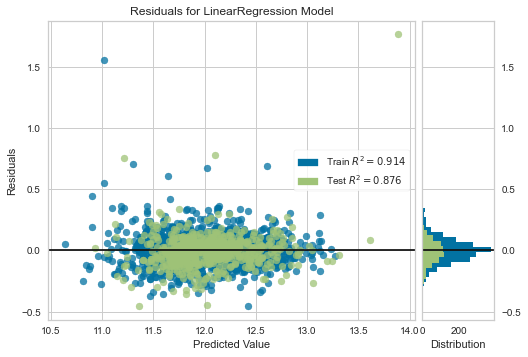

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
from yellowbrick.regressor import ResidualsPlot
ols2 = LinearRegression()
visualizer = ResidualsPlot(ols2)
visualizer.fit(Xtrain, ytrain) 
visualizer.score(Xtest, ytest)  
visualizer.show() 

## Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gBoost = GradientBoostingRegressor()

from sklearn.model_selection import GridSearchCV
# search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
# search=GridSearchCV(estimator=gBoost,param_grid=search_grid,n_jobs=1,cv=cv)
# search.fit(Xtrain,ytrain)

# search.best_params_

In [52]:
# gBoost.set_params()
gBoost.fit(Xtrain,ytrain)
print(gBoost.score(Xtrain,ytrain))
print(gBoost.score(Xtest,ytest))

y_pred = gBoost.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared = False)
print(f'Gradient Boosting RMSE: {RMSE}')

0.9551607186023215
0.8943067033017693
Gradient Boosting RMSE: 0.1241256069776572


<p>After selecting features with lasso, Linear regression R2 was .91, while a default GradientBoostingRegressor yielded .905</p>

# Descriptive Model

In [53]:
for col, coef in zip(post_lasso.columns, ols2.coef_):
    print(f'{col}:   {coef}')

GrLivArea:   0.11741028728829672
LotFrontage:   0.017026760659527934
LotArea:   0.025550450139290228
Street:   -0.005613380682356521
Utilities:   0.0031901488290339377
OverallQual:   0.09775520096364822
OverallCond:   0.05744712197729301
YearBuilt:   0.06346927399315519
YearRemodAdd:   0.0024179697134711804
ExterQual:   0.009110276506265133
BsmtQual:   0.015677426615242053
BsmtFinSF1:   0.0348707024704552
BsmtFinSF2:   0.0064396338634279396
TotalBsmtSF:   0.034998459117093435
HeatingQC:   0.01697545577231372
CentralAir:   0.009717426960610814
1stFlrSF:   0.013920472871512376
LowQualFinSF:   -0.0058409525389774425
BsmtFullBath:   0.008745836282233715
FullBath:   0.002915528463292086
HalfBath:   0.00019042874594317818
KitchenAbvGr:   -0.0097769547970415
KitchenQual:   0.017126494271452082
TotRmsAbvGrd:   0.002794291975458059
Fireplaces:   0.010092794597744327
FireplaceQu:   0.015763913151449538
GarageYrBlt:   0.01760649281876272
GarageCars:   0.02054534377592457
GarageArea:   0.004481926

Text(0.5, 1.0, 'Standardized feature betas in log(SalePrice) linear model')

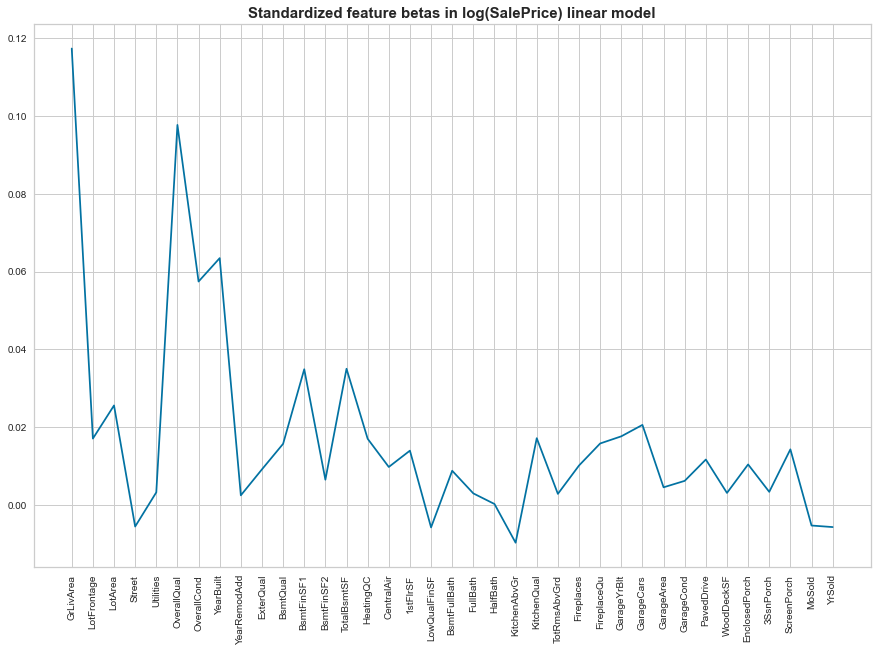

In [54]:
plt.figure(figsize = (15,10))
plt.plot(list(range(len(post_lasso.columns))),ols2.coef_)
plt.xticks(list(range(len(post_lasso.columns))),labels = post_lasso.columns, rotation = 90)
plt.title('Standardized feature betas in log(SalePrice) linear model', fontsize = 15, fontweight = 'bold')

<p>Most influential features in the linear model are GrLivArea, OverallQual, OverallCond, and YearBuilt</p>

In [55]:
from math import exp
test = sc.transform(post_lasso.iloc[8].values.reshape(-1,len(post_lasso.columns)))
137500 - exp(ols2.predict(test))

7545.446382177281

In [56]:
res = []
obs = list(map(exp, ytest))
exp = list(map(exp,y_pred))
for i in range(len(obs)):
    res.append(abs(obs[i]-exp[i]))

In [57]:
print(f'Average predicted price was off by ${np.mean(res)}')
print(f'Closest prediction to actual price was ${np.min(res)}')
print(f'Furthest prediction to actual price was ${np.max(res)}')

Average predicted price was off by $15432.159279218076
Closest prediction to actual price was $1.599741918296786
Furthest prediction to actual price was $474891.58093919687


In [58]:
estate_data = estate[['PID','SalePrice','coord','dist_stadium','dist_downtown','dist_airport']]
geo_price_data = pd.merge(prices, estate_data, on = ['PID','SalePrice'],how = 'inner')

In [59]:
new = geo_price_data["coord"].str.replace('(', '').str.replace(')', '').str.split(",", n = 1, expand = True)
geo_price_data['latitude']= new[0]
geo_price_data['longitude']= new[1]

geo_price_data['latitude'] = pd.to_numeric(geo_price_data['latitude'])
geo_price_data['longitude'] = pd.to_numeric(geo_price_data['longitude'])